In [3]:
import os
import sys
from argparse import Namespace
import main 

In [3]:
import importlib
import main 
importlib.reload(main)

<module 'main' from '/Users/yezhihai/Documents/GitHub/QKLSTM-VQE/QK-QAOA/main.py'>

In [4]:
"""
Define model 
    Args:
        Train_and_Test (bool): whether to train and test the model
        Only_train (bool): whether to only train the model
        Only_test (bool): whether to only test the model
        device (str): the device to run the model, cpu or cuda
        backend_sequence (str): PennyLane backend of sequence model to use for quantum simulations 
        backend_QAOA (str): PennyLane backend of QAOA ansatz to use for quantum simulations
        dataset_save_path (str): the path to load datasets (including training, validation, and testing sets)
        model_save_path (str): the path to save model parameters
        Results_save_path (str): the path to save test results
        model_type (str): the sequence model type. LSTM, QKLSTM, QKLSTM, or QFWP
        mapping_type (str): the mapping model type, Linear (FC) or ID
        loss_function_type (str): the loss function type, weighted or observed improvement (define by Verdon's papaer)
        layers [int]: the number of layers for LSTM, QKLSTM, QLSTM or QFWP
        qaoa_layers [int]: the number of QAOA layers for ansatz
        input_feature_dim [int]: the number of params for LSTM output to QAOA ansatz
        max_total_params [int]: the max numbers for QAOA we need for this experiment
        qubits [int]: the number of qubits for QLSTM and QKLSTM
        lr_sequence [float]: learning rate for LSTM, QKLSTM, QLSTM or FWP
        lr_mapping [float]: learning rate for mapping model
        epochs [int]: the number of training epochs
        steps_recurrent_loop_train [int]: the number of recurrent step for training
        conv_tol_sequence [float]: the convergence tolerance for training
        time_out [int]: the time out for training (in seconds)
        continue_train [bool]: whether continue training from existing model
        load_path (str): the path to load existing model's parameters
        steps_recurrent_loop_test (int): the number of recurrent step for testing (Phase I)
        qaoa_optimizer (str): the optimizer for QAOA, ADAM or SGD
        lr_qaoa (float): learning rate for QAOA optimizer
        max_iter_qaoa (int): the max iteration for QAOA optimizer (Phase II)
        conv_tol_qaoa (float): the convergence tolerance for QAOA optimizer
        
"""

hyperparameter = {
    'Train_and_Test': True,
    'Only_train': False,
    'Only_test': False,
    'device': 'cpu',
    'backend_sequence': 'lightning.qubit',
    'backend_QAOA': 'default.qubit',
    'dataset_save_path': 'example_datasets.pkl',
    'model_save_path': 'example', 
    'Results_save_path': 'example', 
    'model_type': 'QK',   
    'mapping_type': 'Linear',   
    'loss_function_type': 'weighted',
    'layers': 1,        
    'qaoa_layers': 1,
    'input_feature_dim': 2,
    'max_total_params': 2,
    'qubits': 4,
    'lr_sequence': 6e-6,
    'lr_mapping': 1e-4,
    'epochs': 5,     
    'steps_recurrent_loop_train': 10,    
    'conv_tol_sequence': 1e-6,            
    'time_out': 7200,
    'continue_train': False,
    'load_path': None,
    'qaoa_optimizer': 'SGD',
    'lr_qaoa': 1e-3,
    'max_iter_qaoa': 300,
    'conv_tol_qaoa': 1e-6,
    'steps_recurrent_loop_test': 10,
}

args_namespace = Namespace(**hyperparameter)

Datasets loaded from example_datasets.pkl
Train = 1008 samples, Val = 5 samples, Test = 5 samples
The first train graph has 6 nodes and 6 edges.

--- Building and Training Model ---
--- Model Summary ---
L2L(
  (sequence): QKLSTM(
    (clayer_in): Linear(in_features=6, out_features=4, bias=True)
    (clayer_out): Linear(in_features=4, out_features=3, bias=True)
  )
  (mapping): Linear(in_features=3, out_features=2, bias=True)
)
  QK Parameters: 43
  Mapping Parameters: 8

--- Training QK Model ---

--- Starting QK Model Training ---
Epoch 1/5
 > Graph 200/1008 - Loss: -4.32088280
 > Graph 400/1008 - Loss: -5.12048721
 > Graph 600/1008 - Loss: -7.43183613
 > Graph 800/1008 - Loss: -5.84342670
 > Graph 1000/1008 - Loss: -9.48024654
Epoch 1 Mean loss: -5.47186219, Mean val loss:-14.66190666
Current QK learning rate: 0.0000060000
Current mapping learning rate: 0.0001000000
Epoch 2/5
 > Graph 200/1008 - Loss: -4.36334944
 > Graph 400/1008 - Loss: -5.15394020
 > Graph 600/1008 - Loss: -7.411

/Users/yezhihai/Documents/GitHub/QKLSTM-VQE/QK-QAOA/Tutorial/QAOA.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params = torch.tensor(initial_params, requires_grad=True, dtype=torch.float32)


Step = 50/300, Cost = -12.49021722
Step = 100/300, Cost = -12.49901033
Step = 150/300, Cost = -12.50022211
Step = 200/300, Cost = -12.50042621
  Convergence reached at step 212
Optimization finished, final cost: -12.50044080

--- Standard QAOA, Random params ---

--- Starting QAOA Optimization ---
Step = 50/300, Cost = -11.39301498
Step = 100/300, Cost = -12.19758379
Step = 150/300, Cost = -12.42256437
Step = 200/300, Cost = -12.48412104
Step = 250/300, Cost = -12.49738783
Step = 300/300, Cost = -12.49991475
Optimization finished, final cost: -12.49991475
Result of MaxCut QAOA


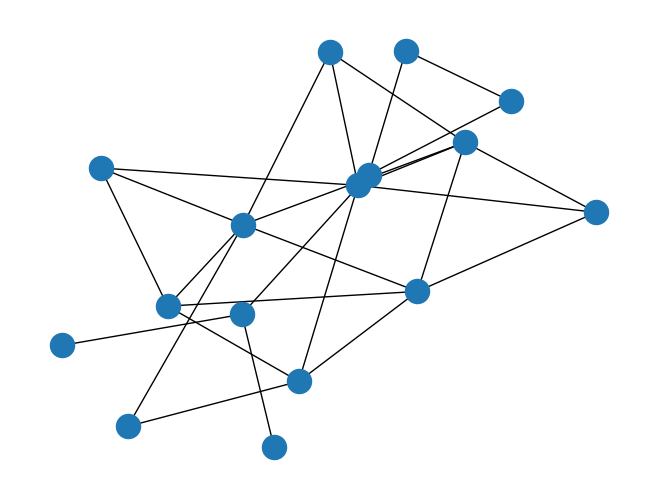

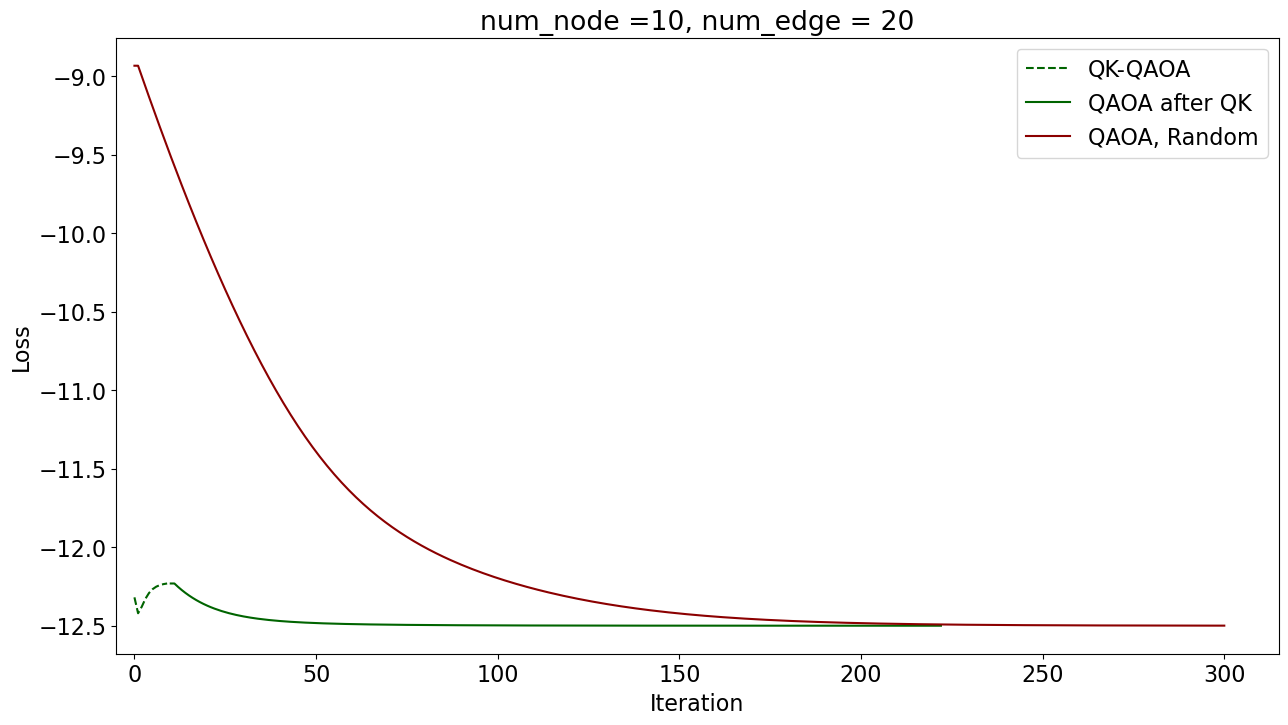


--- Saving Complete ---

--- Sequence model optimization (Phase I) ---

--- Starting QK Model Testing ---

--- Test Graph 2/5 (Nodes: 13, Edges: 73) ---
QK predicted cost:[-34.422738835118054, -36.42096137673687, -37.24223550491935, -37.61319603462437, -37.79735926990942, -37.89573405746989, -37.95108674378337, -37.98335577516414, -38.002620566308366, -38.01430449377958]
QK predicted params:tensor([-0.4008,  0.2514])

--- QAOA optimization after sequence model (Phase II) ---

--- Starting QAOA Optimization ---
Step = 50/300, Cost = -39.31469770
Step = 100/300, Cost = -39.32048934
  Convergence reached at step 117
Optimization finished, final cost: -39.32052903

--- Standard QAOA, Random params ---

--- Starting QAOA Optimization ---
Step = 50/300, Cost = -36.48717854
Step = 100/300, Cost = -36.51459865
Step = 150/300, Cost = -36.52002699
Step = 200/300, Cost = -36.53018834
Step = 250/300, Cost = -36.55379333
Step = 300/300, Cost = -36.63749334
Optimization finished, final cost: -36.63

<Figure size 640x480 with 0 Axes>

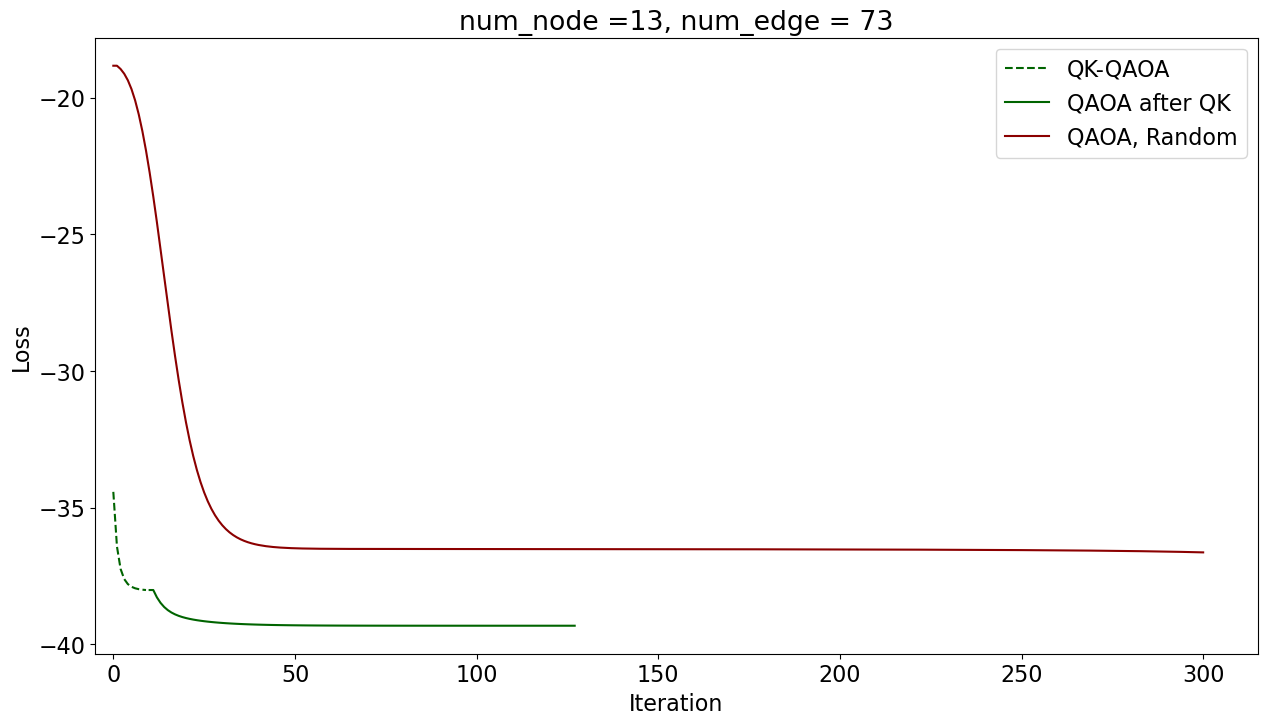


--- Saving Complete ---

--- Sequence model optimization (Phase I) ---

--- Starting QK Model Testing ---

--- Test Graph 3/5 (Nodes: 10, Edges: 43) ---
QK predicted cost:[-21.03019384757588, -22.209005717369376, -22.669675491584343, -22.868454294270276, -22.963523613383497, -23.0129020374144, -23.040136926609403, -23.05579774267636, -23.065061067233472, -23.07064426575606]
QK predicted params:tensor([-0.4008,  0.2514])

--- QAOA optimization after sequence model (Phase II) ---

--- Starting QAOA Optimization ---
Step = 50/300, Cost = -23.53650758
Step = 100/300, Cost = -23.54987180
Step = 150/300, Cost = -23.55062531
  Convergence reached at step 167
Optimization finished, final cost: -23.55065289

--- Standard QAOA, Random params ---

--- Starting QAOA Optimization ---
Step = 50/300, Cost = -22.89869982
Step = 100/300, Cost = -23.49798723
Step = 150/300, Cost = -23.54760036
Step = 200/300, Cost = -23.55049902
  Convergence reached at step 240
Optimization finished, final cost: -23.5

<Figure size 640x480 with 0 Axes>

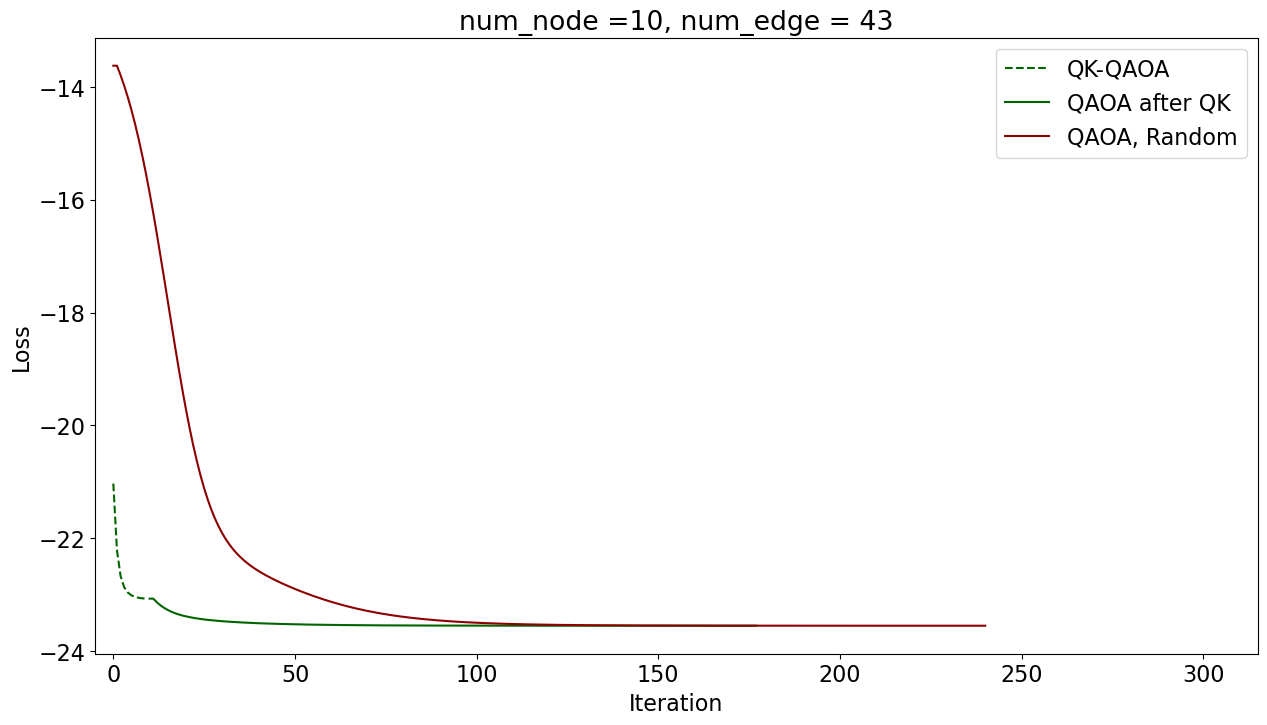


--- Saving Complete ---

--- Sequence model optimization (Phase I) ---

--- Starting QK Model Testing ---

--- Test Graph 4/5 (Nodes: 13, Edges: 53) ---
QK predicted cost:[-28.190110585063717, -29.081519123481407, -29.357118543220782, -29.446613425302175, -29.477409010455418, -29.488485317664313, -29.492568213283484, -29.49407229148008, -29.494604280353382, -29.49476929806993]
QK predicted params:tensor([-0.4008,  0.2514])

--- QAOA optimization after sequence model (Phase II) ---

--- Starting QAOA Optimization ---
Step = 50/300, Cost = -29.66764310
Step = 100/300, Cost = -29.67184407
  Convergence reached at step 124
Optimization finished, final cost: -29.67191175

--- Standard QAOA, Random params ---

--- Starting QAOA Optimization ---
Step = 50/300, Cost = -26.51355205
Step = 100/300, Cost = -26.62467995
Step = 150/300, Cost = -26.83582234
Step = 200/300, Cost = -27.89069125
Step = 250/300, Cost = -29.53040971
Step = 300/300, Cost = -29.66874354
Optimization finished, final cost: 

<Figure size 640x480 with 0 Axes>

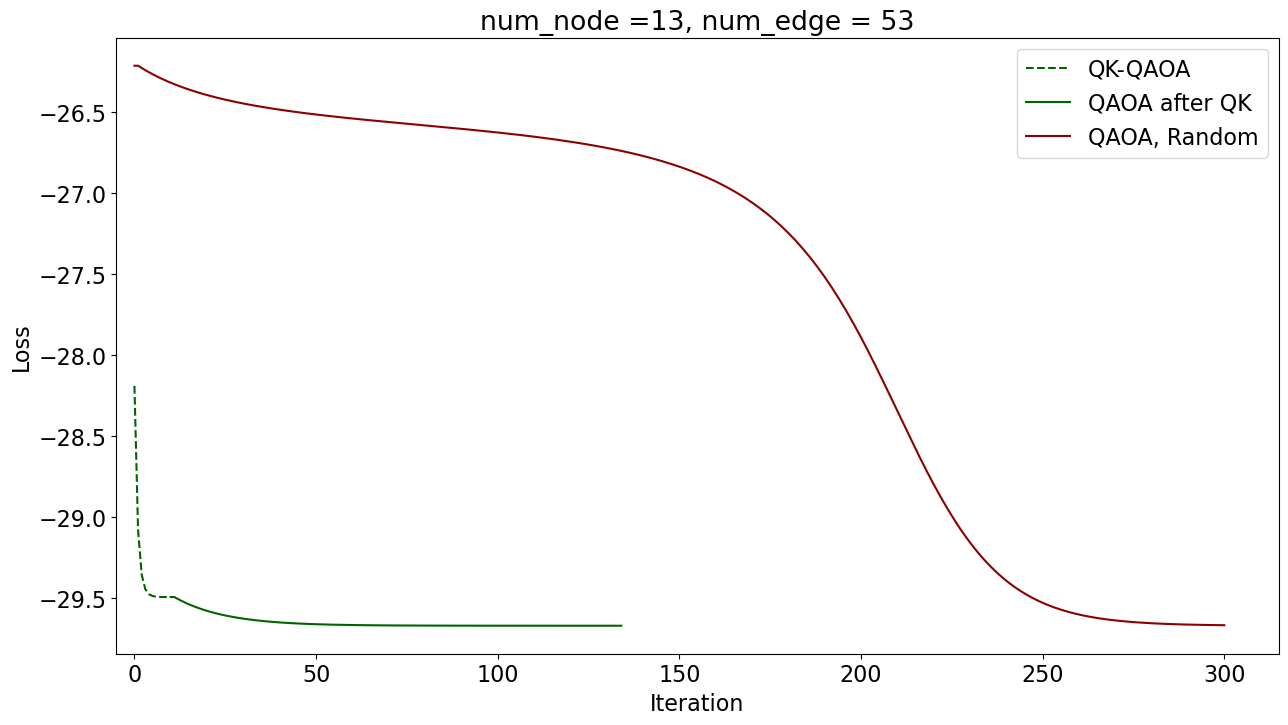


--- Saving Complete ---

--- Sequence model optimization (Phase I) ---

--- Starting QK Model Testing ---

--- Test Graph 5/5 (Nodes: 14, Edges: 77) ---
QK predicted cost:[-37.47617043664781, -39.30379704216199, -40.02309416063602, -40.335802311626544, -40.48630592528623, -40.56482945522495, -40.608261219662545, -40.6332729774744, -40.648075837258006, -40.65699757427258]
QK predicted params:tensor([-0.4008,  0.2514])

--- QAOA optimization after sequence model (Phase II) ---

--- Starting QAOA Optimization ---
Step = 50/300, Cost = -41.68381094
Step = 100/300, Cost = -41.68774918
  Convergence reached at step 108
Optimization finished, final cost: -41.68776102

--- Standard QAOA, Random params ---

--- Starting QAOA Optimization ---
Step = 50/300, Cost = -38.67441021
Step = 100/300, Cost = -39.82727914
Step = 150/300, Cost = -41.66078631
Step = 200/300, Cost = -41.68762629
  Convergence reached at step 227
Optimization finished, final cost: -41.68776158
Result of MaxCut QAOA


<Figure size 640x480 with 0 Axes>

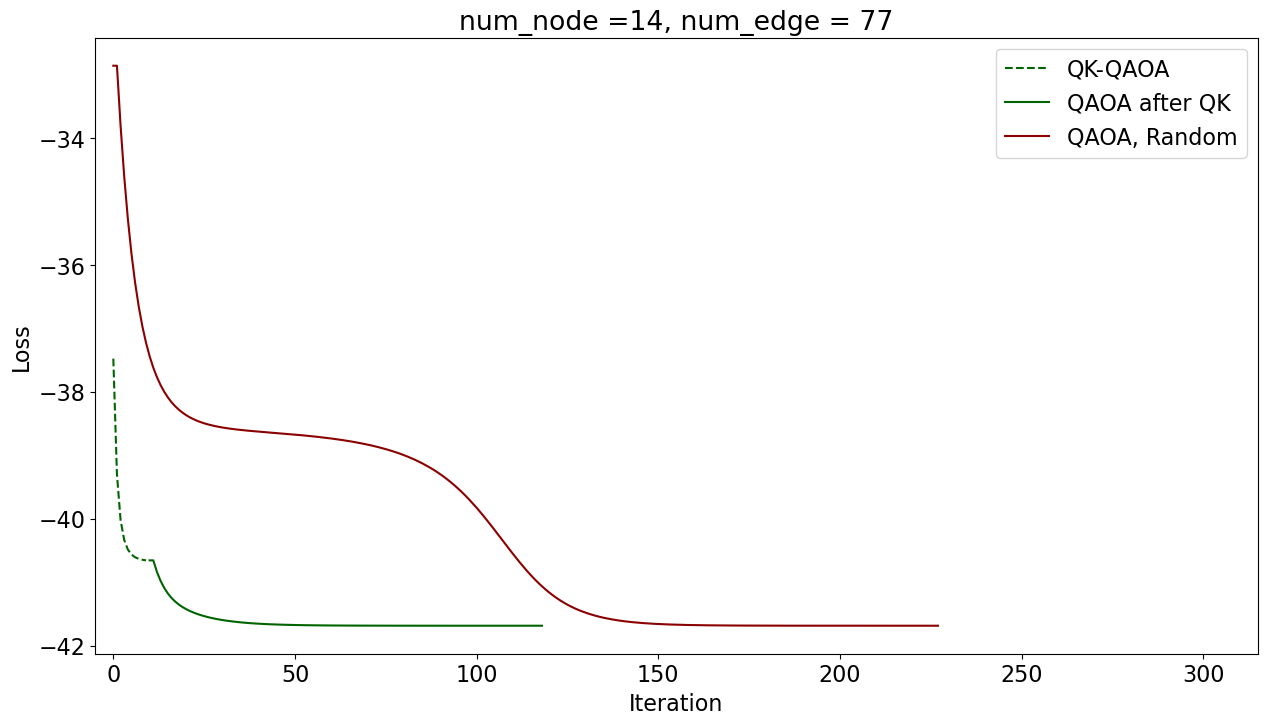


--- Saving Complete ---


<Figure size 640x480 with 0 Axes>

In [5]:
main.run_experiment(args_namespace)